In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

In [2]:
# Explanation on random.randint function
random.randint(a = 1, b = 6)

1

In [3]:
def simulate_die_rolls(n):
    outcomes = []#TODO hint use random.randint
    for i in range(n):
      random_int = random.randint(a = 1, b = 6)
      outcomes.append(random_int)
    return outcomes

#alternative way of shortening for loop when list is expected as output
def simulate_die_rolls(n):
    outcomes = [random.randint(a = 1, b = 6) for i in range(n)]
    return outcomes

def simulate_die_rolls(n):
  return [random.randint(a = 1, b = 6) for i in range(n)]

# TODO Simulate die rolls 1000 times

simulated_outcomes = simulate_die_rolls(n=1000) #TODO
print(len(simulated_outcomes))
print(simulated_outcomes[:10])

1000
[4, 1, 5, 1, 4, 2, 2, 1, 5, 2]


In [4]:
# Explanations on count method
my_dummy_list = [1,2,3,1,2,4,1,2,5,10]

print(my_dummy_list.count(1))
print(my_dummy_list.count(2))
print(my_dummy_list.count(3))
print(my_dummy_list.count(4))
print(my_dummy_list.count(5))
print(my_dummy_list.count(10))
print(my_dummy_list.count(0))

3
3
1
1
1
1
0


In [5]:
# Exercise 7

## Solution 1
def calculate_relative_frequencies(outcomes):
    frequency = {}
    for i in range(1, 7): # from 1 to 6
        count = outcomes.count(i) #TODO count how many i is in outcomes o
        frequency[i] = count / len(outcomes)
    return frequency

## Solution 2
def calculate_relative_frequencies(outcomes): # generalizes for cases when outcomes can table other values than 1,2,3,4,5,6
    frequency = {}
    min_value_in_list = min(outcomes)
    max_value_in_list = max(outcomes)
    for i in range(min_value_in_list, max_value_in_list+1):
        count = outcomes.count(i) #TODO count how many i is in outcomes o
        frequency[i] = count / len(outcomes)
    return frequency

In [6]:
rel_f = calculate_relative_frequencies(simulated_outcomes)
print(rel_f)
print(sum(rel_f.values())) # sum of relatve frequencies should equal 1.

{1: 0.187, 2: 0.155, 3: 0.157, 4: 0.161, 5: 0.182, 6: 0.158}
1.0


In [7]:
# How does range work? Part 1
for i in range(3):
  print(i)

0
1
2


In [8]:
# How does range work? Part 2
for i in range(1,3):
  print(i)

1
2


In [9]:
# How does range work? Part 3
for i in range(1,7):
  print(i)

1
2
3
4
5
6


In [10]:
## Solution 3
s = pd.Series(simulated_outcomes)
s.value_counts(normalize = True)

1    0.187
5    0.182
4    0.161
6    0.158
3    0.157
2    0.155
Name: proportion, dtype: float64

In [11]:
#TODO plot binomial and poison distribution


# Parameters for the binomial distribution
n_binom =  50 # TODO set number of trials
p_binom = 0.8 # TODO set probability of success

# Generate 1000 random samples from the binomial distribution

samples_binom = binom.rvs(n = n_binom, p = p_binom, size = 1000)#TODO use .rvs(n,p,size) from binom module
print(len(samples_binom))
print(samples_binom[:10])

1000
[34 36 41 42 39 38 39 37 44 42]


In [12]:
# Parameters for the Poisson distribution
lambda_poisson = 3  # Average rate of events

# Generate random samples from the Poisson distribution
samples_poisson = poisson.rvs(mu = lambda_poisson, size = 1000)#TODO use .rvs(mu, size) from poisson module
print(len(samples_poisson))
print(samples_poisson[:10])

1000
[2 3 4 1 4 6 2 0 4 5]


In [13]:
# what are the relative frequencies for each integer value?
s = pd.Series(samples_poisson)
s.value_counts(normalize = True)

2     0.233
3     0.214
4     0.175
1     0.149
5     0.096
6     0.059
0     0.040
7     0.024
8     0.007
9     0.002
10    0.001
Name: proportion, dtype: float64

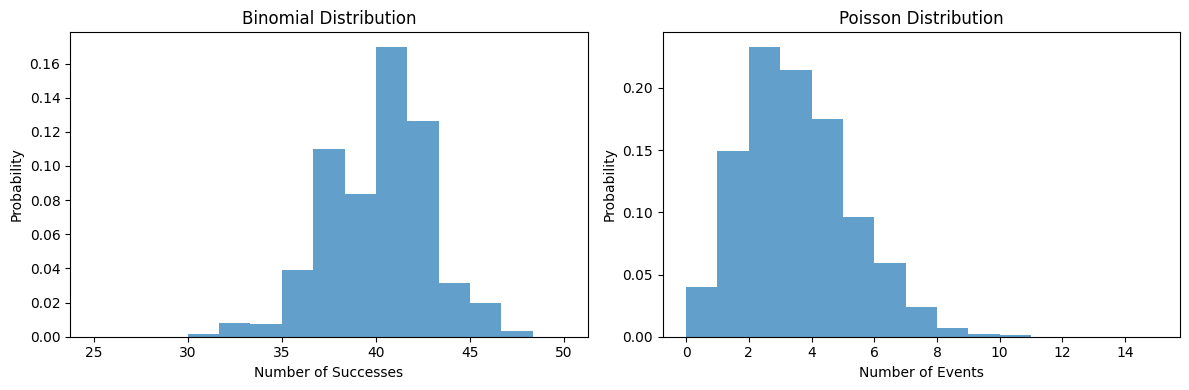

In [14]:
# Plot histogram for the binomial distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(samples_binom, bins=15, density=True, alpha=0.7, range = (25,50))
plt.title('Binomial Distribution')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')

# Plot histogram for the Poisson distribution
plt.subplot(1, 2, 2)
plt.hist(samples_poisson, bins=15, density=True, alpha=0.7, range = (0,15))
plt.title('Poisson Distribution')
plt.xlabel('Number of Events')
plt.ylabel('Probability')

plt.tight_layout()
plt.show()